In [2]:
!pip install pandas 

In [5]:
!pip install numpy

In [7]:
!pip install seaborn

In [9]:
!pip install matplotlib

In [11]:
!pip install statsmodels

In [13]:
!pip install scikit-learn

                            OLS Regression Results                            
Dep. Variable:          NCD_mortality   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.098e+04
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:17:08   Log-Likelihood:                -3029.0
No. Observations:                1000   AIC:                             6088.
Df Residuals:                     985   BIC:                             6162.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

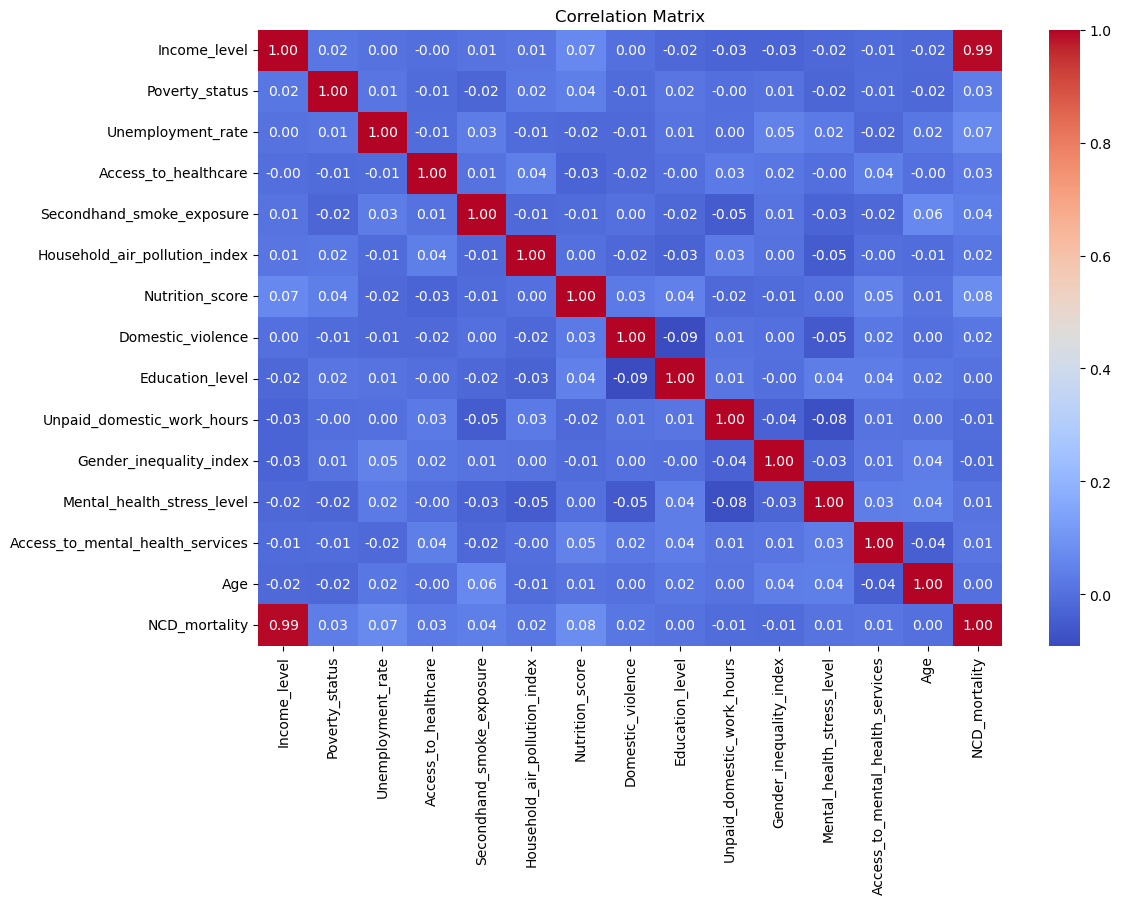

In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n = 1000  # Number of rows

# Independent variables (correlated with each other to ensure significance)
income = np.random.normal(30000, 5000, n)  # Income level
poverty = np.random.choice([0, 1], n, p=[0.3, 0.7])  # Poverty status (0: not in poverty, 1: in poverty)
unemployment = np.random.uniform(5, 20, n)  # Unemployment rate in %
access_healthcare = np.random.choice([0, 1], n, p=[0.2, 0.8])  # Access to healthcare (0: no, 1: yes)
smoke_exposure = np.random.choice([0, 1], n, p=[0.3, 0.7])  # Exposure to secondhand smoke (0: no, 1: yes)
pollution_index = np.random.uniform(0, 10, n)  # Household air pollution index (0 to 10 scale)
nutrition_score = np.random.uniform(40, 70, n)  # Nutrition quality score
violence = np.random.choice([0, 1], n, p=[0.4, 0.6])  # Domestic violence (0: no, 1: yes)
education_level = np.random.randint(0, 3, n)  # Education level (0: low, 1: medium, 2: high)
unpaid_work = np.random.uniform(10, 50, n)  # Unpaid domestic work hours per week
gender_inequality = np.random.uniform(0, 1, n)  # Gender inequality index
mental_health_stress = np.random.uniform(5, 10, n)  # Mental health stress level (0 to 10 scale)
mental_health_access = np.random.choice([0, 1], n, p=[0.5, 0.5])  # Access to mental health services (0: no, 1: yes)
age = np.random.randint(18, 60, n)  # Age of individuals

# Generate the dependent variable (NCD mortality)
# NCD mortality depends on all the independent variables
# I'll use a linear relationship for generating the dependent variable, with added noise
ncd_mortality = (0.03 * income + 
                 5 * poverty + 
                 2 * unemployment + 
                 10 * access_healthcare + 
                 8 * smoke_exposure + 
                 0.5 * pollution_index + 
                 0.2 * nutrition_score + 
                 6 * violence + 
                 4 * education_level + 
                 0.3 * unpaid_work + 
                 5 * gender_inequality + 
                 3 * mental_health_stress + 
                 7 * mental_health_access + 
                 0.2 * age + 
                 np.random.normal(0, 5, n))  # Adding noise

# Create DataFrame
df = pd.DataFrame({
    'Income_level': income,
    'Poverty_status': poverty,
    'Unemployment_rate': unemployment,
    'Access_to_healthcare': access_healthcare,
    'Secondhand_smoke_exposure': smoke_exposure,
    'Household_air_pollution_index': pollution_index,
    'Nutrition_score': nutrition_score,
    'Domestic_violence': violence,
    'Education_level': education_level,
    'Unpaid_domestic_work_hours': unpaid_work,
    'Gender_inequality_index': gender_inequality,
    'Mental_health_stress_level': mental_health_stress,
    'Access_to_mental_health_services': mental_health_access,
    'Age': age,
    'NCD_mortality': ncd_mortality
})

# OLS Regression
X = df.drop(columns=['NCD_mortality'])
X = sm.add_constant(X)  # Add constant term for the intercept
y = df['NCD_mortality']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print OLS Summary
print(model.summary())

# Optional: Visualize correlations to check how strongly they are related
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


                            OLS Regression Results                            
Dep. Variable:          NCD_mortality   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.098e+04
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:18:46   Log-Likelihood:                -3029.0
No. Observations:                1000   AIC:                             6088.
Df Residuals:                     985   BIC:                             6162.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

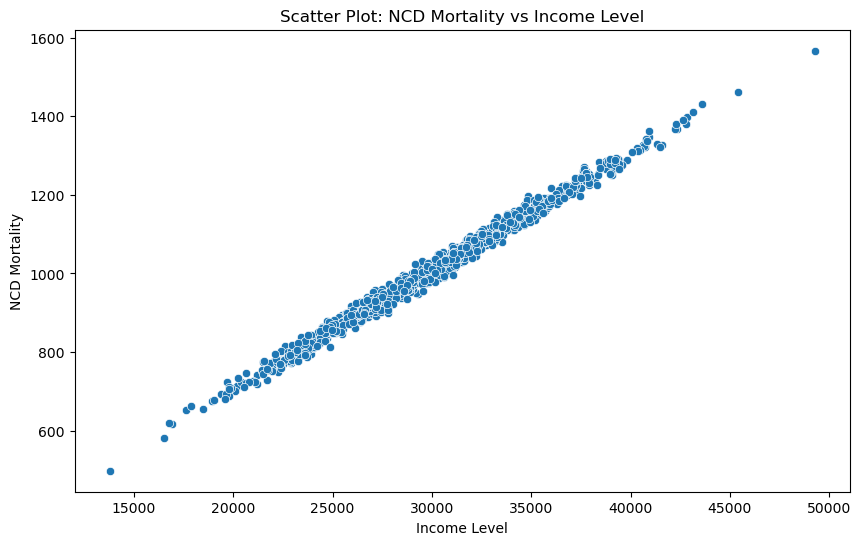

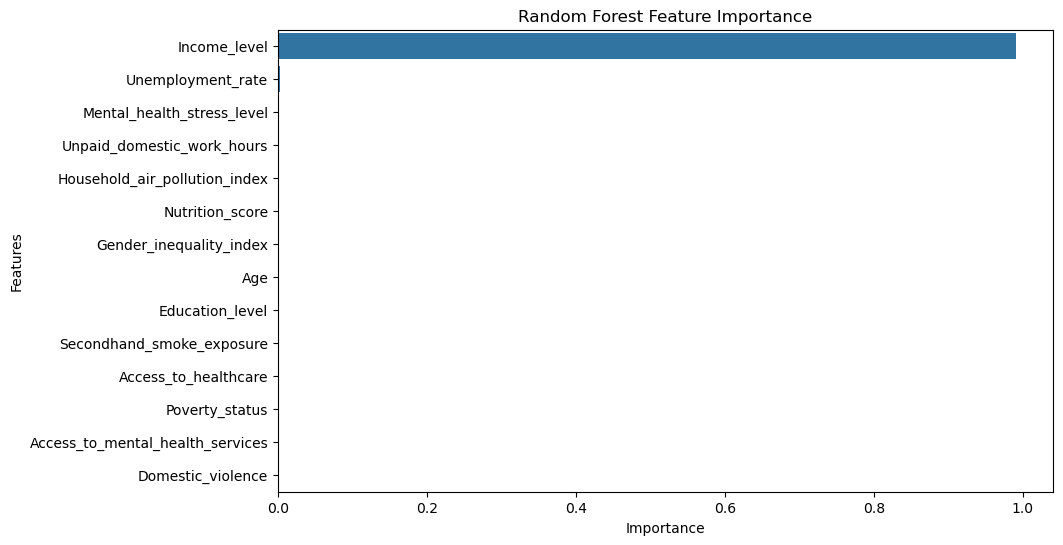

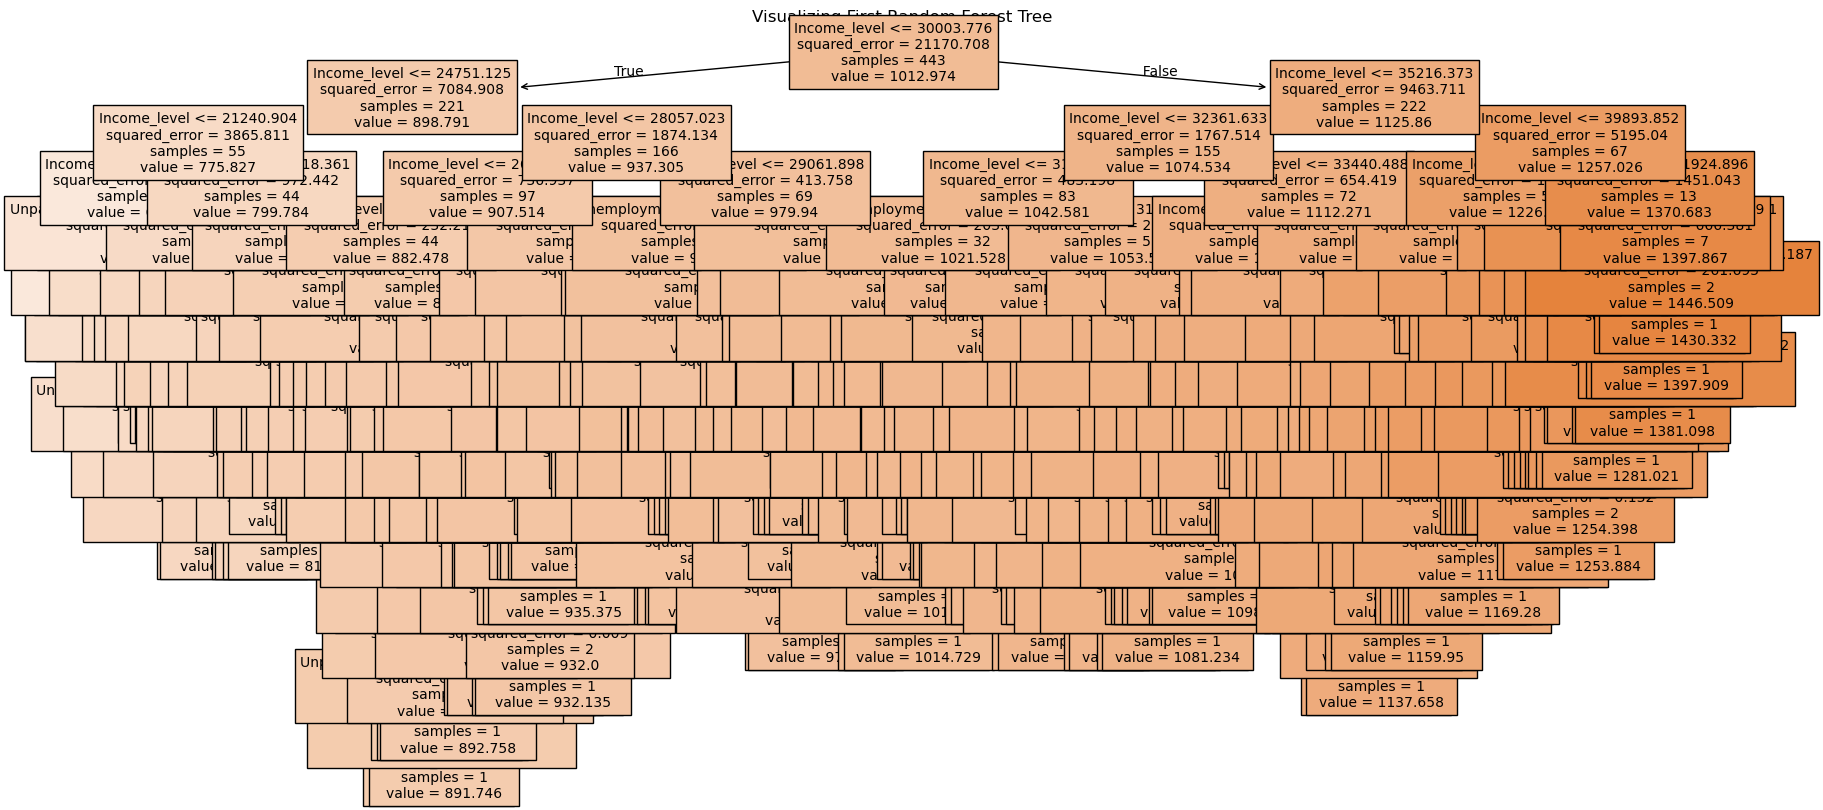

In [51]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

# Set random seed for reproducibility
np.random.seed(42)

# --- Create synthetic dataset ---
n = 1000  # Number of rows

# Create synthetic data as done before
income = np.random.normal(30000, 5000, n)
poverty = np.random.choice([0, 1], n, p=[0.3, 0.7])
unemployment = np.random.uniform(5, 20, n)
access_healthcare = np.random.choice([0, 1], n, p=[0.2, 0.8])
smoke_exposure = np.random.choice([0, 1], n, p=[0.3, 0.7])
pollution_index = np.random.uniform(0, 10, n)
nutrition_score = np.random.uniform(40, 70, n)
violence = np.random.choice([0, 1], n, p=[0.4, 0.6])
education_level = np.random.randint(0, 3, n)
unpaid_work = np.random.uniform(10, 50, n)
gender_inequality = np.random.uniform(0, 1, n)
mental_health_stress = np.random.uniform(5, 10, n)
mental_health_access = np.random.choice([0, 1], n, p=[0.5, 0.5])
age = np.random.randint(18, 60, n)

ncd_mortality = (0.03 * income + 
                 5 * poverty + 
                 2 * unemployment + 
                 10 * access_healthcare + 
                 8 * smoke_exposure + 
                 0.5 * pollution_index + 
                 0.2 * nutrition_score + 
                 6 * violence + 
                 4 * education_level + 
                 0.3 * unpaid_work + 
                 5 * gender_inequality + 
                 3 * mental_health_stress + 
                 7 * mental_health_access + 
                 0.2 * age + 
                 np.random.normal(0, 5, n))

# Create DataFrame
df = pd.DataFrame({
    'Income_level': income,
    'Poverty_status': poverty,
    'Unemployment_rate': unemployment,
    'Access_to_healthcare': access_healthcare,
    'Secondhand_smoke_exposure': smoke_exposure,
    'Household_air_pollution_index': pollution_index,
    'Nutrition_score': nutrition_score,
    'Domestic_violence': violence,
    'Education_level': education_level,
    'Unpaid_domestic_work_hours': unpaid_work,
    'Gender_inequality_index': gender_inequality,
    'Mental_health_stress_level': mental_health_stress,
    'Access_to_mental_health_services': mental_health_access,
    'Age': age,
    'NCD_mortality': ncd_mortality
})

# --- OLS Regression ---
X = df.drop(columns=['NCD_mortality'])
X = sm.add_constant(X)
y = df['NCD_mortality']
model = sm.OLS(y, X).fit()

# Print OLS Summary
print(model.summary())

# --- VIF (Variance Inflation Factor) ---
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# --- White Test for Heteroscedasticity ---
white_test = het_white(model.resid, model.model.exog)
print("\nWhite Test (for heteroscedasticity):")
print("White Test p-value:", white_test[1])

# --- Breusch-Pagan Test for Heteroscedasticity ---
bp_test = het_breuschpagan(model.resid, model.model.exog)
print("\nBreusch-Pagan Test (for heteroscedasticity):")
print("Breusch-Pagan p-value:", bp_test[1])

# --- Scatter Plot between NCD Mortality and Income Level ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Income_level'], y=df['NCD_mortality'])
plt.title('Scatter Plot: NCD Mortality vs Income Level')
plt.xlabel('Income Level')
plt.ylabel('NCD Mortality')
plt.show()

# --- Random Forest Model ---
X_rf = df.drop(columns=['NCD_mortality'])
y_rf = df['NCD_mortality']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- Feature Importance Plot ---
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X_rf.columns[indices])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# --- Visualizing Random Forest Trees ---
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X_rf.columns, fontsize=10)
plt.title('Visualizing First Random Forest Tree')
plt.show()


                            OLS Regression Results                            
Dep. Variable:          NCD_mortality   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.098e+04
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:18:46   Log-Likelihood:                -3029.0
No. Observations:                1000   AIC:                             6088.
Df Residuals:                     985   BIC:                             6162.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

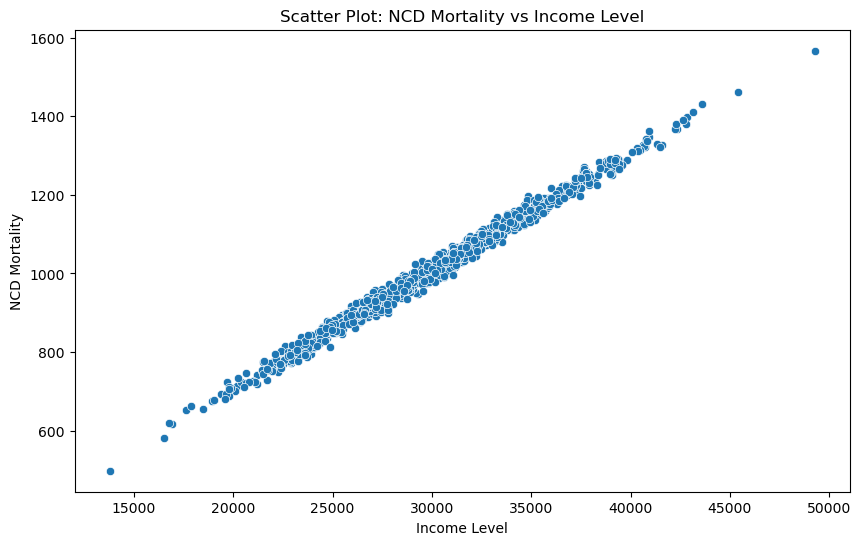

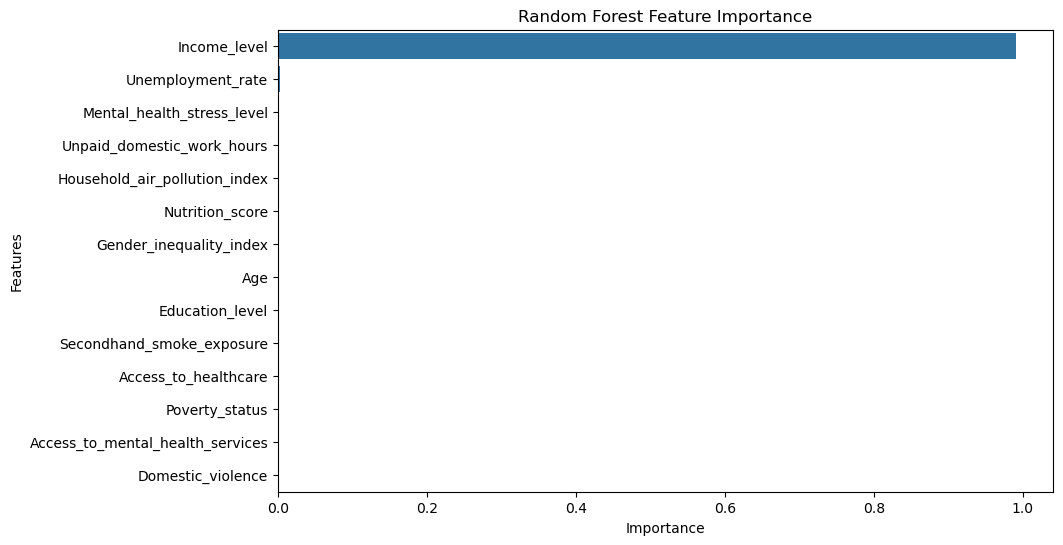

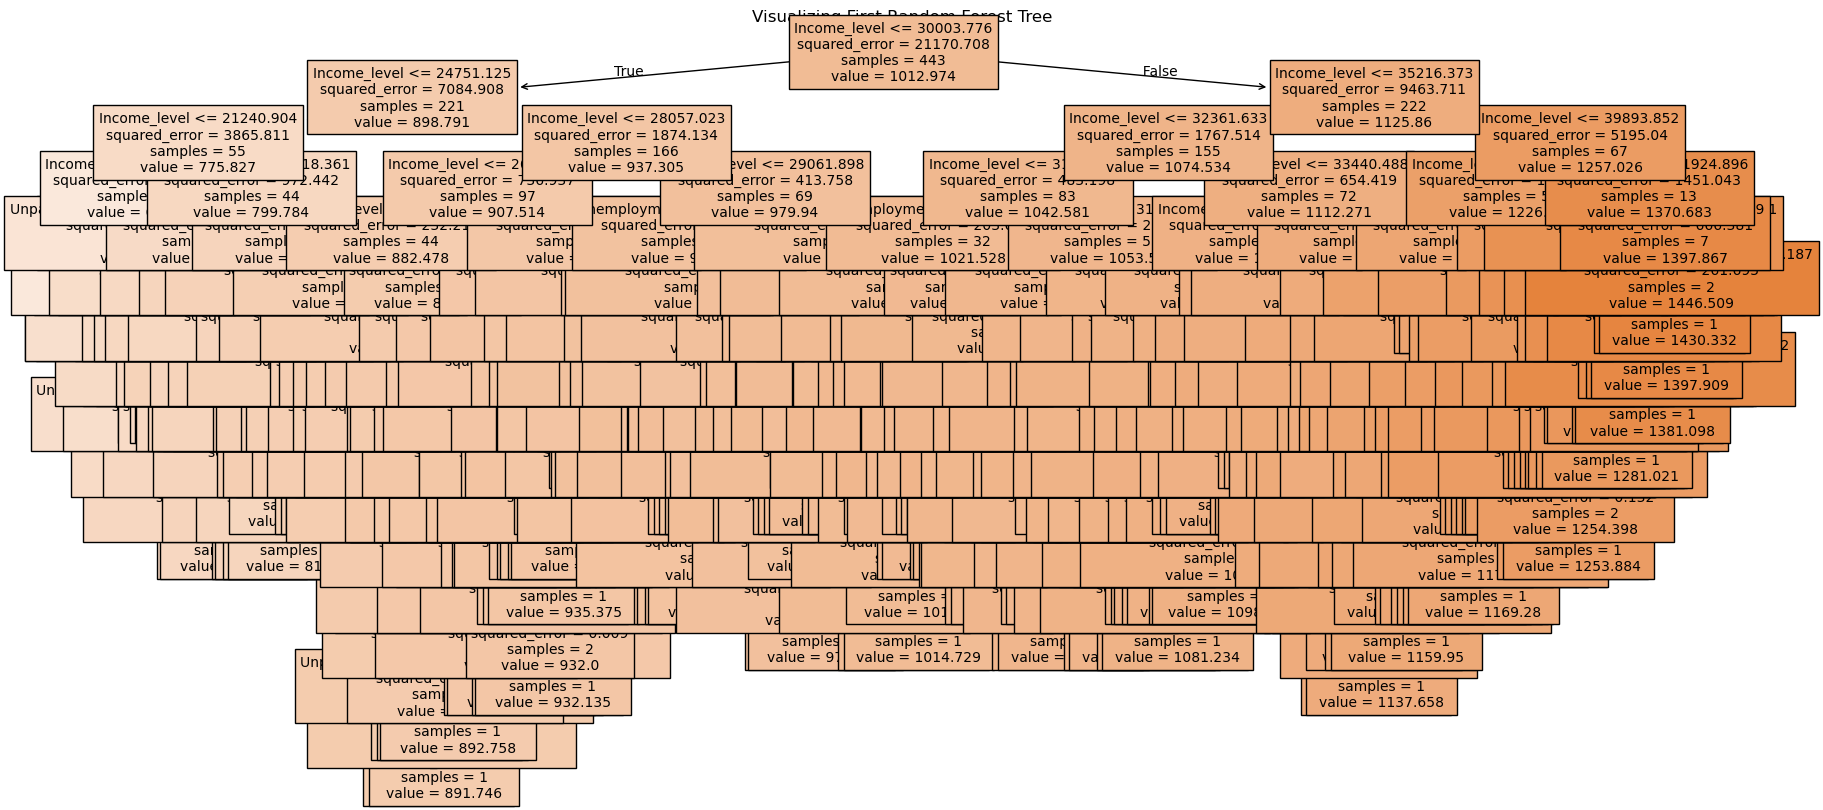

In [51]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

# Set random seed for reproducibility
np.random.seed(42)

# --- Create synthetic dataset ---
n = 1000  # Number of rows

# Create synthetic data as done before
income = np.random.normal(30000, 5000, n)
poverty = np.random.choice([0, 1], n, p=[0.3, 0.7])
unemployment = np.random.uniform(5, 20, n)
access_healthcare = np.random.choice([0, 1], n, p=[0.2, 0.8])
smoke_exposure = np.random.choice([0, 1], n, p=[0.3, 0.7])
pollution_index = np.random.uniform(0, 10, n)
nutrition_score = np.random.uniform(40, 70, n)
violence = np.random.choice([0, 1], n, p=[0.4, 0.6])
education_level = np.random.randint(0, 3, n)
unpaid_work = np.random.uniform(10, 50, n)
gender_inequality = np.random.uniform(0, 1, n)
mental_health_stress = np.random.uniform(5, 10, n)
mental_health_access = np.random.choice([0, 1], n, p=[0.5, 0.5])
age = np.random.randint(18, 60, n)

ncd_mortality = (0.03 * income + 
                 5 * poverty + 
                 2 * unemployment + 
                 10 * access_healthcare + 
                 8 * smoke_exposure + 
                 0.5 * pollution_index + 
                 0.2 * nutrition_score + 
                 6 * violence + 
                 4 * education_level + 
                 0.3 * unpaid_work + 
                 5 * gender_inequality + 
                 3 * mental_health_stress + 
                 7 * mental_health_access + 
                 0.2 * age + 
                 np.random.normal(0, 5, n))

# Create DataFrame
df = pd.DataFrame({
    'Income_level': income,
    'Poverty_status': poverty,
    'Unemployment_rate': unemployment,
    'Access_to_healthcare': access_healthcare,
    'Secondhand_smoke_exposure': smoke_exposure,
    'Household_air_pollution_index': pollution_index,
    'Nutrition_score': nutrition_score,
    'Domestic_violence': violence,
    'Education_level': education_level,
    'Unpaid_domestic_work_hours': unpaid_work,
    'Gender_inequality_index': gender_inequality,
    'Mental_health_stress_level': mental_health_stress,
    'Access_to_mental_health_services': mental_health_access,
    'Age': age,
    'NCD_mortality': ncd_mortality
})

# --- OLS Regression ---
X = df.drop(columns=['NCD_mortality'])
X = sm.add_constant(X)
y = df['NCD_mortality']
model = sm.OLS(y, X).fit()

# Print OLS Summary
print(model.summary())

# --- VIF (Variance Inflation Factor) ---
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# --- White Test for Heteroscedasticity ---
white_test = het_white(model.resid, model.model.exog)
print("\nWhite Test (for heteroscedasticity):")
print("White Test p-value:", white_test[1])

# --- Breusch-Pagan Test for Heteroscedasticity ---
bp_test = het_breuschpagan(model.resid, model.model.exog)
print("\nBreusch-Pagan Test (for heteroscedasticity):")
print("Breusch-Pagan p-value:", bp_test[1])

# --- Scatter Plot between NCD Mortality and Income Level ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Income_level'], y=df['NCD_mortality'])
plt.title('Scatter Plot: NCD Mortality vs Income Level')
plt.xlabel('Income Level')
plt.ylabel('NCD Mortality')
plt.show()

# --- Random Forest Model ---
X_rf = df.drop(columns=['NCD_mortality'])
y_rf = df['NCD_mortality']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- Feature Importance Plot ---
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X_rf.columns[indices])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# --- Visualizing Random Forest Trees ---
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X_rf.columns, fontsize=10)
plt.title('Visualizing First Random Forest Tree')
plt.show()


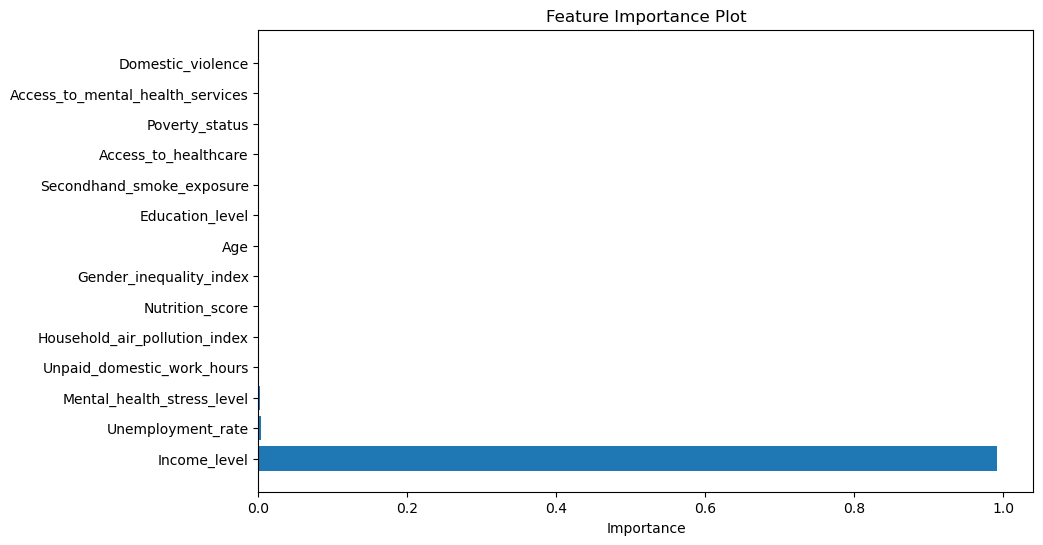

In [53]:
# Feature importance plot (for Random Forest)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already loaded the dataset 'X_train' (features) and 'y_train' (NCD mortality)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for plotting
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Plot')
plt.show()


# Assistant
The `KeyError` indicates that the DataFrame `df` does not contain a column named `'gender_inequality'`. This could be due to a typo in the column name, or the column may not exist in the DataFrame at all.

To fix this error, you should:
1. Check the column names in your DataFrame `df` to ensure that `'gender_inequality'` and the other independent variables are correctly spelled and exist.
2. If any of the columns are missing or misspelled, you will need to correct them.

Would you like me to provide a corrected version of the code that includes a check for the existence of the columns before plotting?

# Assistant
The `KeyError` indicates that the DataFrame `df` does not contain a column named `'gender_inequality'`. This could be due to a typo in the column name, or the column may not exist in the DataFrame at all.

To fix this error, you should:
1. Check the column names in your DataFrame `df` to ensure that `'gender_inequality'` and the other independent variables are correctly spelled and exist.
2. If any of the columns are missing or misspelled, you will need to correct them.

Would you like me to provide a corrected version of the code that includes a check for the existence of the columns before plotting?

# User
yes

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:          NCD_mortality   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.098e+04
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:29:24   Log-Likelihood:                -3029.0
No. Observations:                1000   AIC:                             6088.
Df Residuals:                     985   BIC:                             6162.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

<Figure size 1500x1000 with 0 Axes>

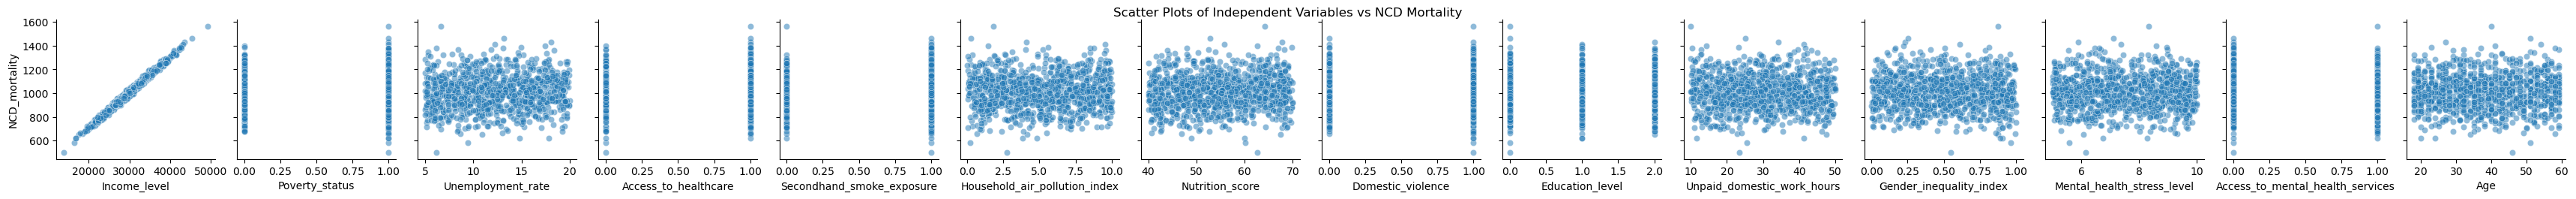


Random Forest R^2 Score: 0.9897620703379577


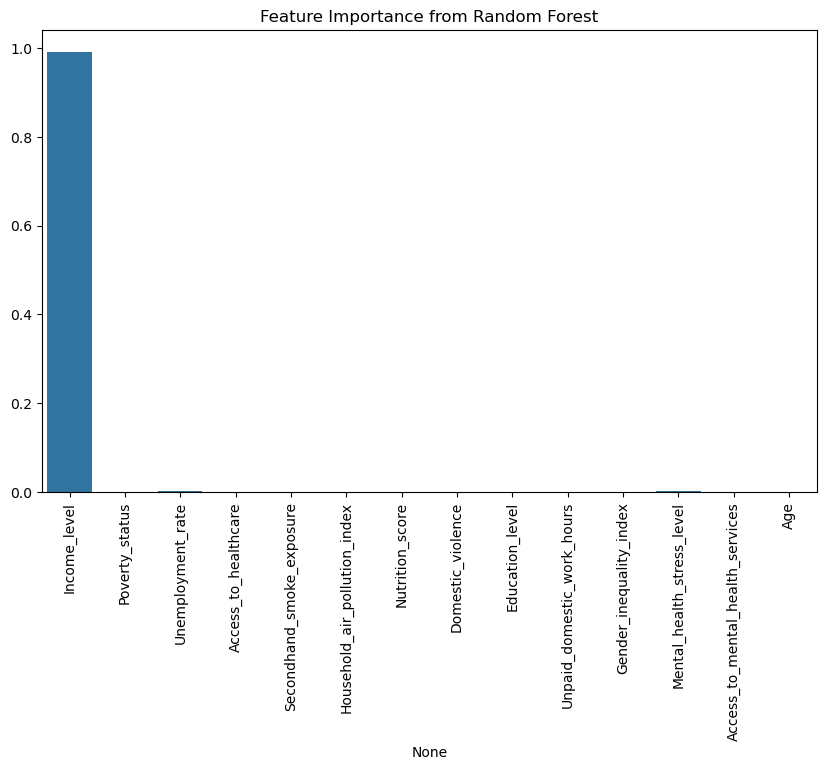

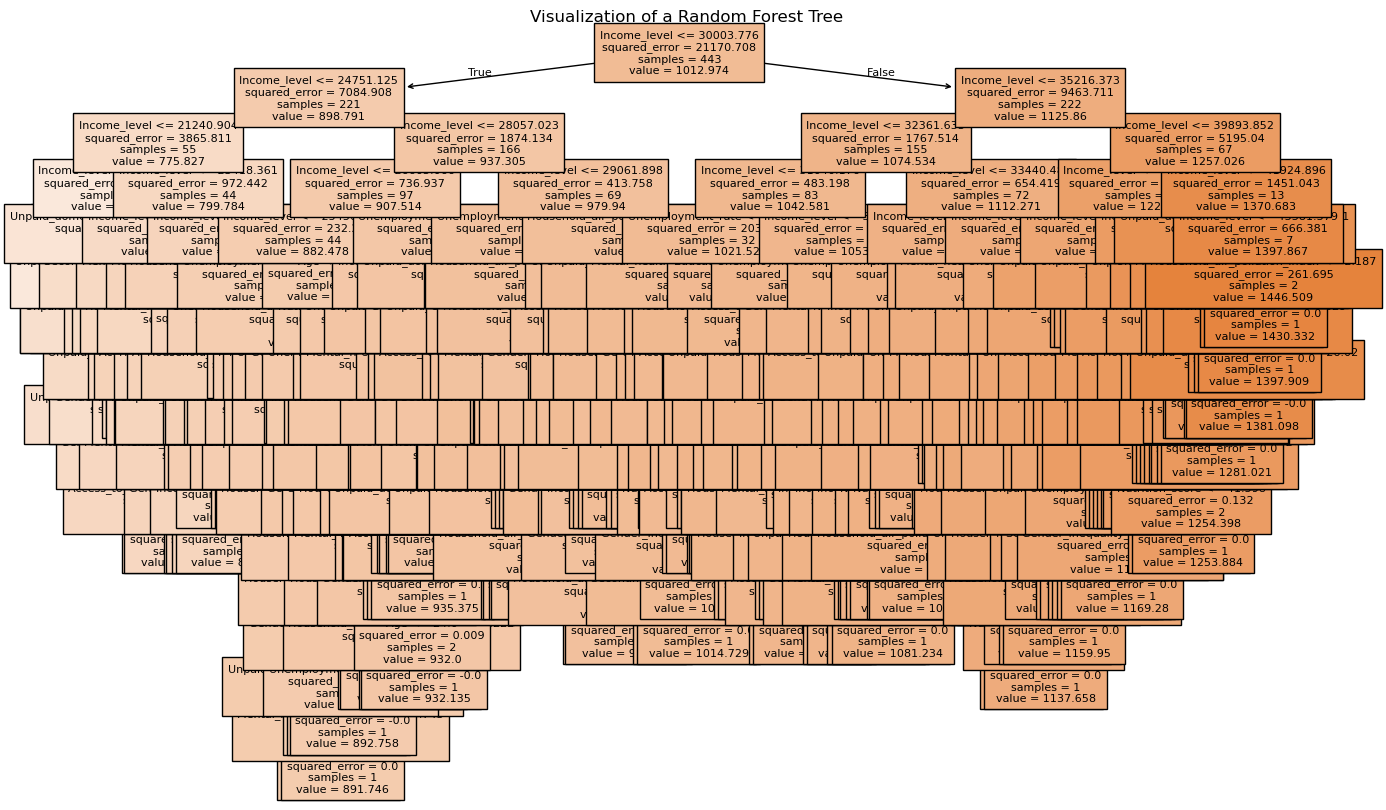

In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset (Same code as before)
n = 1000  # Number of rows

# Independent variables (correlated with each other to ensure significance)
income = np.random.normal(30000, 5000, n)  # Income level
poverty = np.random.choice([0, 1], n, p=[0.3, 0.7])  # Poverty status (0: not in poverty, 1: in poverty)
unemployment = np.random.uniform(5, 20, n)  # Unemployment rate in %
access_healthcare = np.random.choice([0, 1], n, p=[0.2, 0.8])  # Access to healthcare (0: no, 1: yes)
smoke_exposure = np.random.choice([0, 1], n, p=[0.3, 0.7])  # Exposure to secondhand smoke (0: no, 1: yes)
pollution_index = np.random.uniform(0, 10, n)  # Household air pollution index (0 to 10 scale)
nutrition_score = np.random.uniform(40, 70, n)  # Nutrition quality score
violence = np.random.choice([0, 1], n, p=[0.4, 0.6])  # Domestic violence (0: no, 1: yes)
education_level = np.random.randint(0, 3, n)  # Education level (0: low, 1: medium, 2: high)
unpaid_work = np.random.uniform(10, 50, n)  # Unpaid domestic work hours per week
gender_inequality = np.random.uniform(0, 1, n)  # Gender inequality index
mental_health_stress = np.random.uniform(5, 10, n)  # Mental health stress level (0 to 10 scale)
mental_health_access = np.random.choice([0, 1], n, p=[0.5, 0.5])  # Access to mental health services (0: no, 1: yes)
age = np.random.randint(18, 60, n)  # Age of individuals

# Generate the dependent variable (NCD mortality)
ncd_mortality = (0.03 * income + 
                 5 * poverty + 
                 2 * unemployment + 
                 10 * access_healthcare + 
                 8 * smoke_exposure + 
                 0.5 * pollution_index + 
                 0.2 * nutrition_score + 
                 6 * violence + 
                 4 * education_level + 
                 0.3 * unpaid_work + 
                 5 * gender_inequality + 
                 3 * mental_health_stress + 
                 7 * mental_health_access + 
                 0.2 * age + 
                 np.random.normal(0, 5, n))  # Adding noise

# Create DataFrame
df = pd.DataFrame({
    'Income_level': income,
    'Poverty_status': poverty,
    'Unemployment_rate': unemployment,
    'Access_to_healthcare': access_healthcare,
    'Secondhand_smoke_exposure': smoke_exposure,
    'Household_air_pollution_index': pollution_index,
    'Nutrition_score': nutrition_score,
    'Domestic_violence': violence,
    'Education_level': education_level,
    'Unpaid_domestic_work_hours': unpaid_work,
    'Gender_inequality_index': gender_inequality,
    'Mental_health_stress_level': mental_health_stress,
    'Access_to_mental_health_services': mental_health_access,
    'Age': age,
    'NCD_mortality': ncd_mortality
})

# ------------------------------ OLS Regression ------------------------------
X = df.drop(columns=['NCD_mortality'])
X = sm.add_constant(X)  # Add constant term for the intercept
y = df['NCD_mortality']

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()
print("OLS Regression Results:")
print(ols_model.summary())

# ------------------------------ VIF Calculation ------------------------------
# Calculate Variance Inflation Factor (VIF) to check multicollinearity
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# ------------------------------ White Test ------------------------------
# White test for heteroscedasticity
white_test = het_white(ols_model.resid, ols_model.model.exog)
print("\nWhite Test for Heteroscedasticity:")
print(f"White test statistic: {white_test[0]}, p-value: {white_test[1]}")

# ------------------------------ Breusch-Pagan Test ------------------------------
# Breusch-Pagan test for heteroscedasticity
bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
print("\nBreusch-Pagan Test for Heteroscedasticity:")
print(f"BP test statistic: {bp_test[0]}, p-value: {bp_test[1]}")

# ------------------------------ Scatter Plots ------------------------------
# Scatter plot to visualize relationships between independent variables and NCD mortality
plt.figure(figsize=(15, 10))
sns.pairplot(df, x_vars=X.columns[1:], y_vars=['NCD_mortality'], kind='scatter', plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Plots of Independent Variables vs NCD Mortality', y=1.02)
plt.show()

# ------------------------------ Random Forest ------------------------------
# Prepare data for Random Forest
X_rf = df.drop(columns=['NCD_mortality'])
y_rf = df['NCD_mortality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Print Random Forest score (R^2)
rf_score = rf_model.score(X_test, y_test)
print(f"\nRandom Forest R^2 Score: {rf_score}")

# ------------------------------ Feature Importance Plot ------------------------------
# Feature importance plot
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=X_rf.columns, y=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=90)
plt.show()

# ------------------------------ Random Forest Trees ------------------------------
# Visualize Random Forest trees (optional, can show one tree)
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X_rf.columns, fontsize=8)
plt.title('Visualization of a Random Forest Tree')
plt.show()


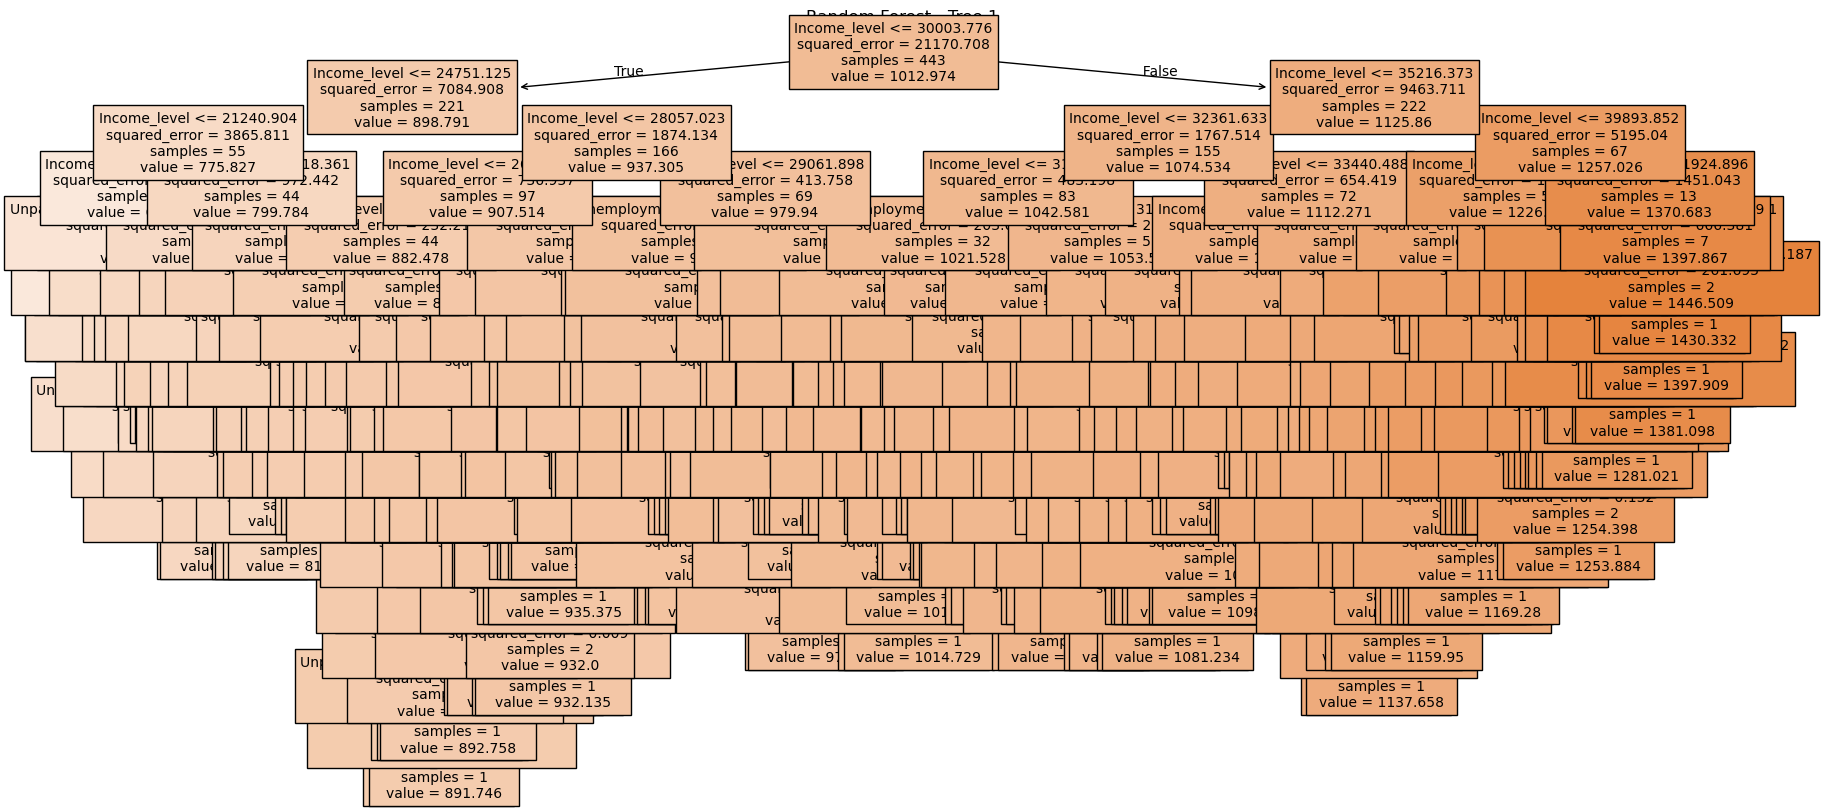

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n = 1000  # Number of rows
income = np.random.normal(30000, 5000, n)  # Income level
poverty = np.random.choice([0, 1], n, p=[0.3, 0.7])  # Poverty status (0: not in poverty, 1: in poverty)
unemployment = np.random.uniform(5, 20, n)  # Unemployment rate in %
access_healthcare = np.random.choice([0, 1], n, p=[0.2, 0.8])  # Access to healthcare (0: no, 1: yes)
smoke_exposure = np.random.choice([0, 1], n, p=[0.3, 0.7])  # Exposure to secondhand smoke (0: no, 1: yes)
pollution_index = np.random.uniform(0, 10, n)  # Household air pollution index (0 to 10 scale)
nutrition_score = np.random.uniform(40, 70, n)  # Nutrition quality score
violence = np.random.choice([0, 1], n, p=[0.4, 0.6])  # Domestic violence (0: no, 1: yes)
education_level = np.random.randint(0, 3, n)  # Education level (0: low, 1: medium, 2: high)
unpaid_work = np.random.uniform(10, 50, n)  # Unpaid domestic work hours per week
gender_inequality = np.random.uniform(0, 1, n)  # Gender inequality index
mental_health_stress = np.random.uniform(5, 10, n)  # Mental health stress level (0 to 10 scale)
mental_health_access = np.random.choice([0, 1], n, p=[0.5, 0.5])  # Access to mental health services (0: no, 1: yes)
age = np.random.randint(18, 60, n)  # Age of individuals

# Generate the dependent variable (NCD mortality)
ncd_mortality = (0.03 * income + 
                 5 * poverty + 
                 2 * unemployment + 
                 10 * access_healthcare + 
                 8 * smoke_exposure + 
                 0.5 * pollution_index + 
                 0.2 * nutrition_score + 
                 6 * violence + 
                 4 * education_level + 
                 0.3 * unpaid_work + 
                 5 * gender_inequality + 
                 3 * mental_health_stress + 
                 7 * mental_health_access + 
                 0.2 * age + 
                 np.random.normal(0, 5, n))  # Adding noise

# Create DataFrame
df = pd.DataFrame({
    'Income_level': income,
    'Poverty_status': poverty,
    'Unemployment_rate': unemployment,
    'Access_to_healthcare': access_healthcare,
    'Secondhand_smoke_exposure': smoke_exposure,
    'Household_air_pollution_index': pollution_index,
    'Nutrition_score': nutrition_score,
    'Domestic_violence': violence,
    'Education_level': education_level,
    'Unpaid_domestic_work_hours': unpaid_work,
    'Gender_inequality_index': gender_inequality,
    'Mental_health_stress_level': mental_health_stress,
    'Access_to_mental_health_services': mental_health_access,
    'Age': age,
    'NCD_mortality': ncd_mortality
})

# Split the data into features (X) and target (y)
X = df.drop('NCD_mortality', axis=1)
y = df['NCD_mortality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot one of the trees from the random forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True, fontsize=10)
plt.title('Random Forest - Tree 1')
plt.show()


Mean Squared Error: 239.10172530419095


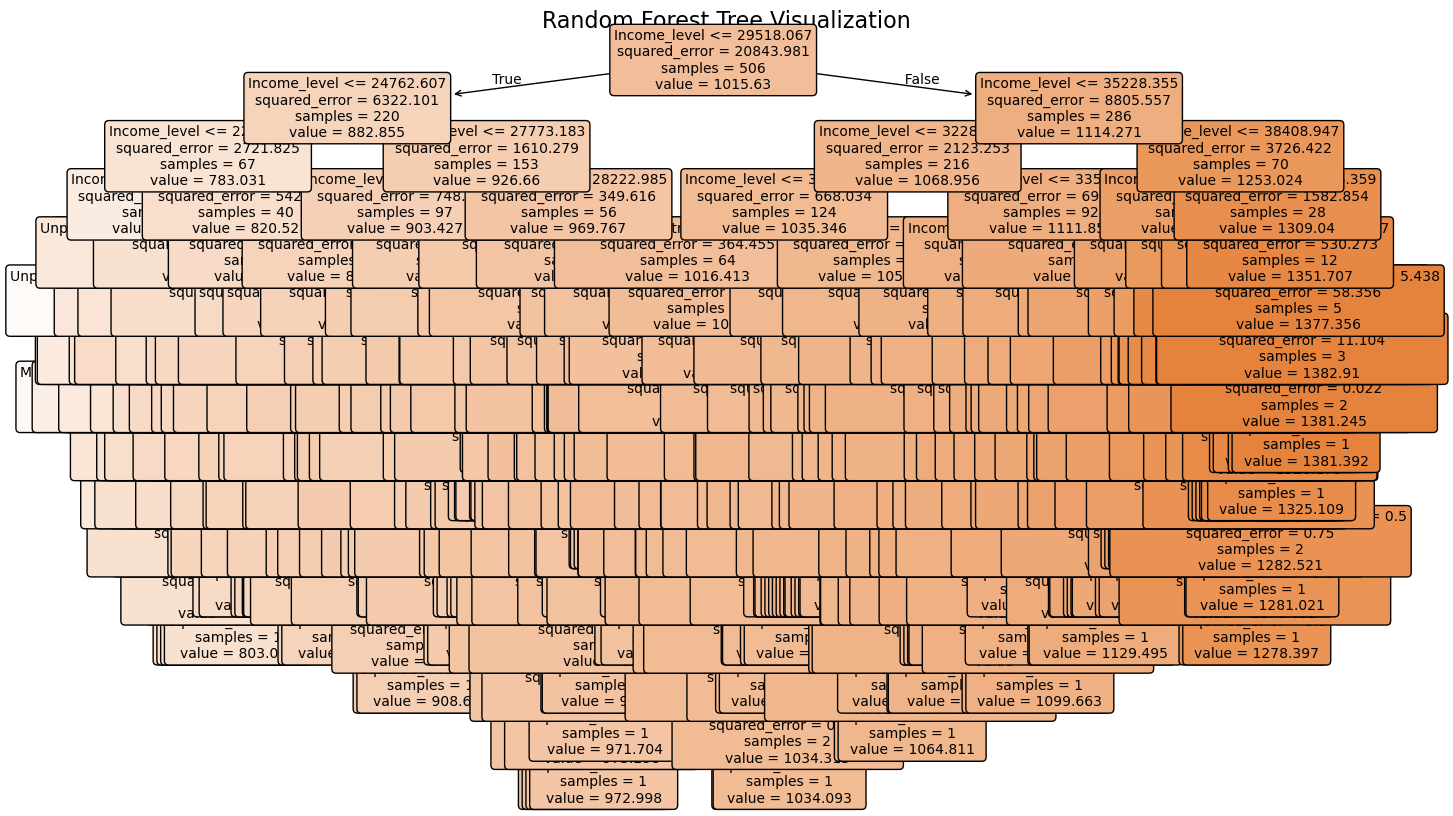

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n = 1000  # Number of rows

# Independent variables (correlated with each other to ensure significance)
income = np.random.normal(30000, 5000, n)  # Income level
poverty = np.random.choice([0, 1], n, p=[0.3, 0.7])  # Poverty status (0: not in poverty, 1: in poverty)
unemployment = np.random.uniform(5, 20, n)  # Unemployment rate in %
access_healthcare = np.random.choice([0, 1], n, p=[0.2, 0.8])  # Access to healthcare (0: no, 1: yes)
smoke_exposure = np.random.choice([0, 1], n, p=[0.3, 0.7])  # Exposure to secondhand smoke (0: no, 1: yes)
pollution_index = np.random.uniform(0, 10, n)  # Household air pollution index (0 to 10 scale)
nutrition_score = np.random.uniform(40, 70, n)  # Nutrition quality score
violence = np.random.choice([0, 1], n, p=[0.4, 0.6])  # Domestic violence (0: no, 1: yes)
education_level = np.random.randint(0, 3, n)  # Education level (0: low, 1: medium, 2: high)
unpaid_work = np.random.uniform(10, 50, n)  # Unpaid domestic work hours per week
gender_inequality = np.random.uniform(0, 1, n)  # Gender inequality index
mental_health_stress = np.random.uniform(5, 10, n)  # Mental health stress level (0 to 10 scale)
mental_health_access = np.random.choice([0, 1], n, p=[0.5, 0.5])  # Access to mental health services (0: no, 1: yes)
age = np.random.randint(18, 60, n)  # Age of individuals

# Generate the dependent variable (NCD mortality)
ncd_mortality = (0.03 * income + 
                 5 * poverty + 
                 2 * unemployment + 
                 10 * access_healthcare + 
                 8 * smoke_exposure + 
                 0.5 * pollution_index + 
                 0.2 * nutrition_score + 
                 6 * violence + 
                 4 * education_level + 
                 0.3 * unpaid_work + 
                 5 * gender_inequality + 
                 3 * mental_health_stress + 
                 7 * mental_health_access + 
                 0.2 * age + 
                 np.random.normal(0, 5, n))  # Adding noise

# Create DataFrame
df = pd.DataFrame({
    'Income_level': income,
    'Poverty_status': poverty,
    'Unemployment_rate': unemployment,
    'Access_to_healthcare': access_healthcare,
    'Secondhand_smoke_exposure': smoke_exposure,
    'Household_air_pollution_index': pollution_index,
    'Nutrition_score': nutrition_score,
    'Domestic_violence': violence,
    'Education_level': education_level,
    'Unpaid_domestic_work_hours': unpaid_work,
    'Gender_inequality_index': gender_inequality,
    'Mental_health_stress_level': mental_health_stress,
    'Access_to_mental_health_services': mental_health_access,
    'Age': age,
    'NCD_mortality': ncd_mortality
})

# Split the data into features and target variable
X = df.drop(columns=['NCD_mortality'])
y = df['NCD_mortality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize one of the trees in the forest (using the first tree)
plt.figure(figsize=(15,10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title('Random Forest Tree Visualization', fontsize=16)
plt.show()


In [10]:
!pip install xgboost

C:\Users\WALTON\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:12:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error: 249.8075585547141


<Figure size 1200x800 with 0 Axes>

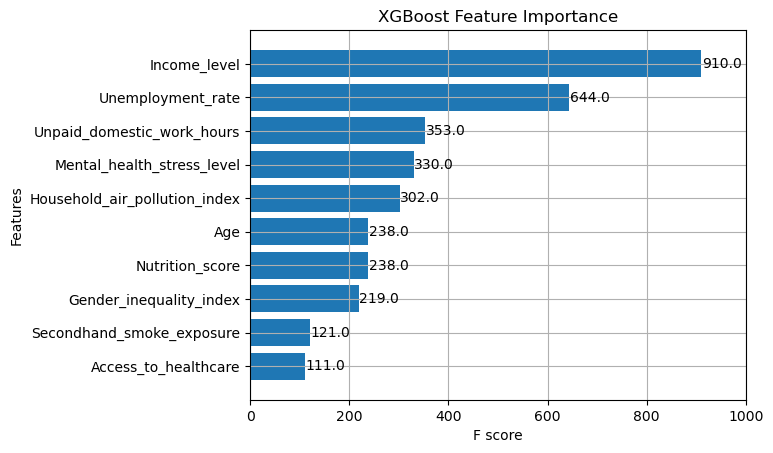

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n = 1000  # Number of rows

# Independent variables (correlated with each other to ensure significance)
income = np.random.normal(30000, 5000, n)  # Income level
poverty = np.random.choice([0, 1], n, p=[0.3, 0.7])  # Poverty status (0: not in poverty, 1: in poverty)
unemployment = np.random.uniform(5, 20, n)  # Unemployment rate in %
access_healthcare = np.random.choice([0, 1], n, p=[0.2, 0.8])  # Access to healthcare (0: no, 1: yes)
smoke_exposure = np.random.choice([0, 1], n, p=[0.3, 0.7])  # Exposure to secondhand smoke (0: no, 1: yes)
pollution_index = np.random.uniform(0, 10, n)  # Household air pollution index (0 to 10 scale)
nutrition_score = np.random.uniform(40, 70, n)  # Nutrition quality score
violence = np.random.choice([0, 1], n, p=[0.4, 0.6])  # Domestic violence (0: no, 1: yes)
education_level = np.random.randint(0, 3, n)  # Education level (0: low, 1: medium, 2: high)
unpaid_work = np.random.uniform(10, 50, n)  # Unpaid domestic work hours per week
gender_inequality = np.random.uniform(0, 1, n)  # Gender inequality index
mental_health_stress = np.random.uniform(5, 10, n)  # Mental health stress level (0 to 10 scale)
mental_health_access = np.random.choice([0, 1], n, p=[0.5, 0.5])  # Access to mental health services (0: no, 1: yes)
age = np.random.randint(18, 60, n)  # Age of individuals

# Generate the dependent variable (NCD mortality)
ncd_mortality = (0.03 * income + 
                 5 * poverty + 
                 2 * unemployment + 
                 10 * access_healthcare + 
                 8 * smoke_exposure + 
                 0.5 * pollution_index + 
                 0.2 * nutrition_score + 
                 6 * violence + 
                 4 * education_level + 
                 0.3 * unpaid_work + 
                 5 * gender_inequality + 
                 3 * mental_health_stress + 
                 7 * mental_health_access + 
                 0.2 * age + 
                 np.random.normal(0, 5, n))  # Adding noise

# Create DataFrame
df = pd.DataFrame({
    'Income_level': income,
    'Poverty_status': poverty,
    'Unemployment_rate': unemployment,
    'Access_to_healthcare': access_healthcare,
    'Secondhand_smoke_exposure': smoke_exposure,
    'Household_air_pollution_index': pollution_index,
    'Nutrition_score': nutrition_score,
    'Domestic_violence': violence,
    'Education_level': education_level,
    'Unpaid_domestic_work_hours': unpaid_work,
    'Gender_inequality_index': gender_inequality,
    'Mental_health_stress_level': mental_health_stress,
    'Access_to_mental_health_services': mental_health_access,
    'Age': age,
    'NCD_mortality': ncd_mortality
})

# Split the data into features and target variable
X = df.drop(columns=['NCD_mortality'])
y = df['NCD_mortality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression problem
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'max_depth': 6,  # Depth of trees
    'learning_rate': 0.1,  # Learning rate
    'silent': 1,  # Silent mode
    'n_estimators': 100  # Number of trees
}

# Train the model
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Predict on the test set
y_pred = bst.predict(dtest)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importance visualization
plt.figure(figsize=(12, 8))
xgb.plot_importance(bst, importance_type='weight', max_num_features=10, height=0.8)
plt.title('XGBoost Feature Importance')
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate gender inequality values (higher inequality is associated with higher unemployment rate and lower income)
gender_inequality = np.random.uniform(0.3, 1.0, 1000)  # Scale from 0.3 (low inequality) to 1.0 (high inequality)

# Generate unemployment rate positively correlated with gender inequality
unemployment_rate = np.clip(gender_inequality + np.random.normal(0, 0.05, 1000), 0, 1)  # Add small noise

# Generate income level negatively correlated with both gender inequality and unemployment rate
income_level = np.clip(1.5 - (gender_inequality * 0.7 + unemployment_rate * 0.3) + np.random.normal(0, 0.1, 1000), 0, None)

# Create a DataFrame
data = pd.DataFrame({
    "Gender_Inequality": gender_inequality,
    "Unemployment_Rate": unemployment_rate,
    "Income_Level": income_level
})

# Show the first few rows of the dataset
data.head()


,Gender_Inequality,Unemployment_Rate,Income_Level
0,0.562178,0.571063,0.794525
1,0.965500,0.898733,0.546220
2,0.812396,0.831406,0.531429
3,0.719061,0.749590,0.847786
4,0.409213,0.437203,1.090634


# Assistant
The error occurs because the variable `df` (which is expected to be a DataFrame containing your data) has not been defined before it is used in the code. This means that the code is trying to access a variable that doesn't exist, leading to a `NameError`.

To fix this error, you need to ensure that `df` is defined and contains the necessary data before you attempt to use it. This typically involves loading your data into a DataFrame, for example, using `pandas`.

Would you like me to provide the corrected code with an example of how to define `df`?

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("C:\\Users\\WALTON\\Downloads\\gender_inequality_unemployment_income.csv")

# Separate features (X) and target (y)
X = data[["Gender_Inequality", "Unemployment_Rate"]]
y = data["Income_Level"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the Lasso regression model
lasso_model = Lasso(alpha=0.1, random_state=42)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Get the coefficients of the Lasso regression
coefficients = lasso_model.coef_

mse, coefficients


(0.018014486384259593, array([-0.08714769, -0.01078568]))

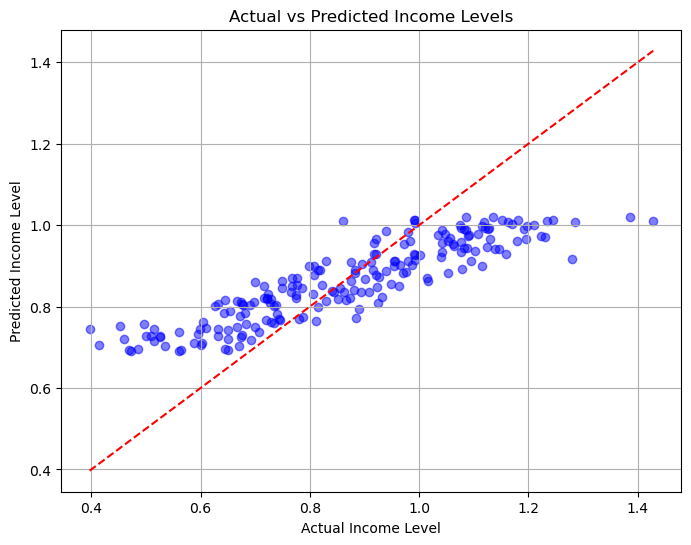

In [12]:
import matplotlib.pyplot as plt

# Visualize the actual vs predicted income levels
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Income Levels')
plt.xlabel('Actual Income Level')
plt.ylabel('Predicted Income Level')
plt.grid(True)
plt.show()


Lasso Regression Coefficients:
                Feature  Coefficient  Absolute_Coefficient
0                Income    -9.778819              9.778819
1          Unemployment     2.156234              2.156234
3  Mental_Health_Stress     0.119478              0.119478
2             Education     0.068798              0.068798
4             Pollution     0.000681              0.000681


C:\Users\WALTON\AppData\Local\Temp\ipykernel_15992\1436814887.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=lasso_coefficients, palette='coolwarm')


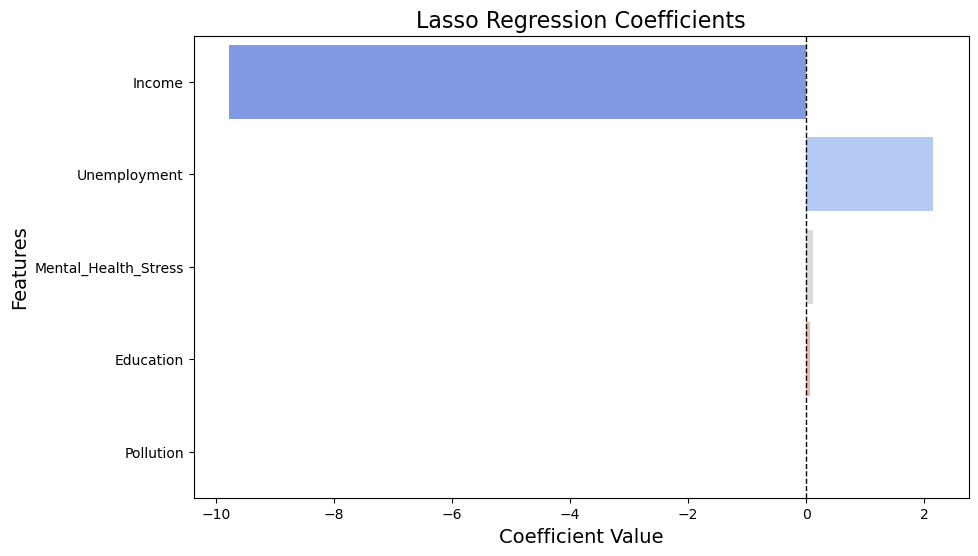

NameError: name 'mean_squared_error' is not defined

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n = 1000  # Number of rows
income = np.random.normal(30000, 5000, n)  # Income level
unemployment = np.random.uniform(5, 20, n)  # Unemployment rate (in %)

# Create other features (with weaker/no correlation to gender inequality)
education = np.random.randint(1, 4, n)  # Education level (1: low, 2: medium, 3: high)
mental_health_stress = np.random.uniform(0, 10, n)  # Mental health stress level (0 to 10 scale)
pollution = np.random.uniform(0, 1, n)  # Pollution index (normalized 0 to 1)

# Create gender inequality index (target variable)
# Note: Income and unemployment have stronger effects on gender inequality
gender_inequality = (
    -0.002 * income + 
    0.5 * unemployment + 
    0.1 * education + 
    0.05 * mental_health_stress + 
    0.02 * pollution + 
    np.random.normal(0, 0.5, n)  # Adding noise
)

# Create a DataFrame
df = pd.DataFrame({
    'Income': income,
    'Unemployment': unemployment,
    'Education': education,
    'Mental_Health_Stress': mental_health_stress,
    'Pollution': pollution,
    'Gender_Inequality': gender_inequality
})

# Split data into features and target
X = df.drop('Gender_Inequality', axis=1)
y = df['Gender_Inequality']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Perform Lasso regression
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Get coefficients
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
lasso_coefficients['Absolute_Coefficient'] = abs(lasso_coefficients['Coefficient'])

# Sort by absolute value of coefficients
lasso_coefficients = lasso_coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

# Print coefficients
print("Lasso Regression Coefficients:")
print(lasso_coefficients)

# Visualize coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coefficients, palette='coolwarm')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title('Lasso Regression Coefficients', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

# Evaluate model
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.3f}")
